<a href="https://colab.research.google.com/github/Sanket-Rajgiri/Salary_Prediction/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction

**Problem :** 
Given a dataset which captures gross salary from July 2013 through June 2014 and includes only those employees who were employed on June 2014. Predict Salaries for employeess in Baltimore.

## Outline

>1.import dataset

>2.data cleaning and preprocessing

>3.exploratory data analysis

>4.feature engineering

>5.train-test-split

>6.model building

>7.model evaluation







It is always a good practice to work on a copy of dataset 

In [1]:
#import libraries for analysis
import numpy as np
import pandas as pd

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries for train-test-split
from sklearn.model_selection import train_test_split

#import libraries for scaling
from sklearn.preprocessing import StandardScaler

#import libraries for model building
from sklearn.linear_model import LinearRegression

#Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

##**Importing Dataset**

The dataset is in csv format and can be imported using read_csv by pandas



In [2]:
salary=pd.read_csv('/content/drive/MyDrive/Shape AI/Linear Regression')

In [3]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


##**Data Cleaning and Preparation**

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


There are 18981 rows and 7 columns in dataset.


All columns of type of object


In [5]:
salary_cpy=salary.copy()

In [6]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

Removing leading space in first column Name

In [7]:
salary_cpy.columns =salary_cpy.columns.str.strip()

In [8]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
#Check Null Values 

salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

Dropping Records where HireDate is Null 
it will make our data more useful

In [10]:
salary_cpy=salary_cpy.dropna(subset=['HireDate'])

salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [11]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


GrossPay and Annual Salary are interdependent. So we can  Predict either Gross Salary or Annual Salary as these both are same things. So we can drop gross pay columns as it has ore null values. This makes Annual Salary as our Target column. 

In [12]:
salary_cpy=salary_cpy.drop('GrossPay',axis=1)

In [13]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary'], dtype='object')

In [14]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02676      1
W02524      1
W02689      1
W02688      1
W02590      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1177 agencies in Baltimore. As per general understanding AgencyId represents agency, we should have same number of agencies as well.

In [15]:
#Value count for Agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
HLTH-Health Dept Locatio       6
M-R Labor Commissioner         6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

Here we can see that there are only 65 Agencies.

So we can say that Agencies are having multiple AgencyID depending on some other factors.

In [16]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                   4817
POLICE OFFICER                   1866
LABORER (Hourly)                  597
EMT Firefighter Suppression       358
CROSSING GUARD                    337
                                 ... 
ANAYLST/PROGRAMMER,LEAD             1
Library Computer Systems Supv       1
MEDICAL CLAIMS PROCESSOR II         1
BUDGET/MANAGEMENT ANALYST IV        1
WASTE WATER PLANT OPNS SUPV         1
Name: JobTitle, Length: 1073, dtype: int64

In [17]:
#value counts on HireDate

salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
03/29/2011       1
09/25/1992       1
09/30/2003       1
06/18/1998       1
09/08/1992       1
Name: HireDate, Length: 4737, dtype: int64

In Annual Salary '$' is not necessary. So removing it and conveting value in float.

In [18]:
salary_cpy['AnnualSalary']=salary_cpy['AnnualSalary'].apply(lambda x: (float)(str(x)[1:]))

In [19]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

Extracting Hiring Day , Month , Year from HiringDate using Lambda Function

In [20]:
salary_cpy['HireDay']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[3:5])))

In [21]:
salary_cpy['HireMonth']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[0:2])))


In [22]:
salary_cpy['HireYear']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[6:])))


In [23]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [24]:
#trimming all catogorical to make sure there are no leading or trailling spaces and no double spaces between words

salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x:str(x).strip().replace("  "," "))

In [25]:
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x:str(x).strip().replace("  "," "))


In [26]:
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x:str(x).strip().replace("  "," "))

In [27]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [28]:
#It can be seen that some of the job titles are in upper case and mix of both which might affect analysis
#So converting them to uppercase and also Agency and AgencyID.

In [29]:
salary_cpy['JobTitle']=salary['JobTitle'].apply(lambda x:str(x).upper())  

In [30]:
salary_cpy['AgencyID']=salary['AgencyID'].apply(lambda x:str(x).upper())  


In [31]:
salary_cpy['Agency']=salary['Agency'].apply(lambda x:str(x).upper())  


In [32]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013


The Last thing left in data preparation is outlier treatment. So lets create Box Plot for Annual salary and check for outliers

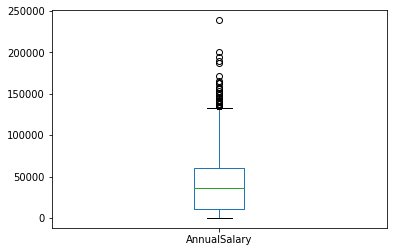

In [33]:
salary_cpy.AnnualSalary.plot.box()
plt.show()



1.   We can say there are few salaries which are way far from other salaries
2.   They might effect the prediction, so we have to eliminate them.



In [34]:
#SUmmaru stats of annual salary

salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

Delete rows whose annual salary is greater than 150000 according to box plot 

In [35]:
salary_cpy.shape

(18911, 9)

In [36]:
salary_cpy=salary_cpy[salary_cpy['AnnualSalary']<140000]

In [37]:
salary_cpy.shape

(18885, 9)

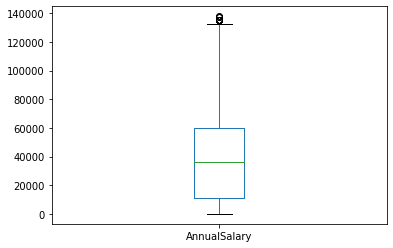

In [38]:
salary_cpy.AnnualSalary.plot.box()
plt.show()


Now that we are done with data preparation we can move to next step that is EDA.

We will First check the distribution of annual salary by creating a distplot

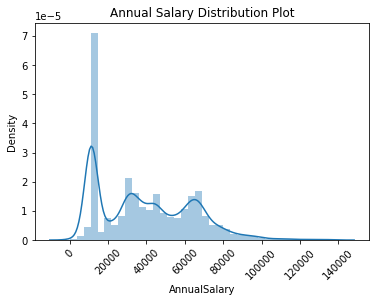

In [39]:
sns.distplot(salary_cpy.AnnualSalary)
plt.xticks(rotation=45)
plt.title('Annual Salary Distribution Plot')
plt.show()


Data seems to be randomly distributed and there seems not many people more than salary of 100000

Let us check jobs for which people are hired the most. For this we will be creating a barplot.

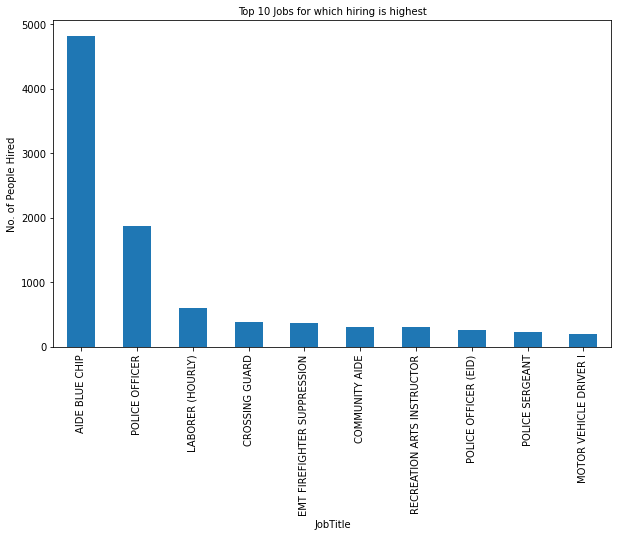

In [40]:
plt.figure(figsize=(10,6))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No. of People Hired')
plt.title('Top 10 Jobs for which hiring is highest',fontsize=10)
plt.show()


This plot shows more number of people were hired for AIDE Blue Chip followed by job of Police Officer. Other than these two all other job titles have less than 1000 workers.

Let us check the top 10 Jobs fetch highest salary

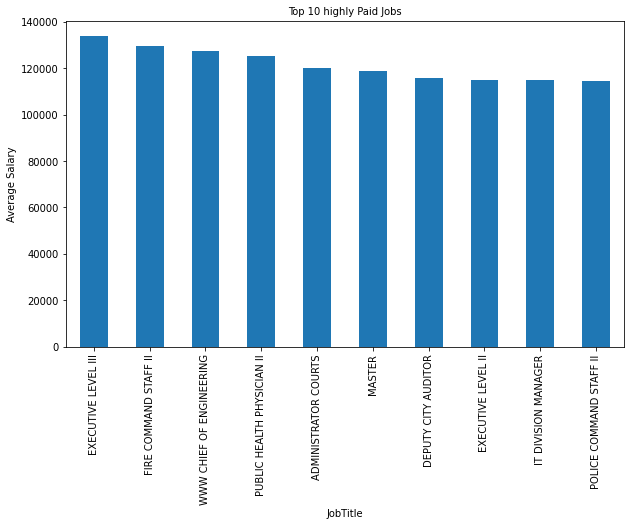

In [41]:
plt.figure(figsize=(10,6))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Average Salary')
plt.title('Top 10 highly Paid Jobs',fontsize=10)
plt.show()


Number of Jobs whose average pay is more than total average salary

In [42]:
#find mean salary

mean_salary=salary_cpy.AnnualSalary.mean()

In [43]:
good_paying_jobs=salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_salary]['JobTitle'].count()

797

Let us check Top 10 Agencies and AgencyID with highest number of employees

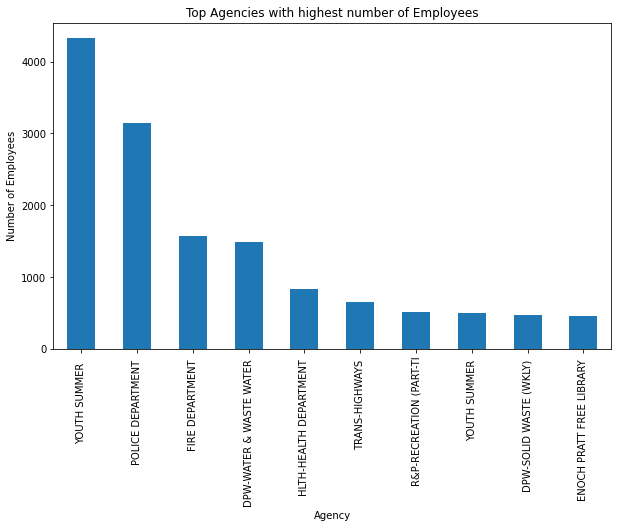

In [44]:
plt.figure(figsize=(10,6))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Employees')
plt.title('Top Agencies with highest number of Employees')
plt.show()

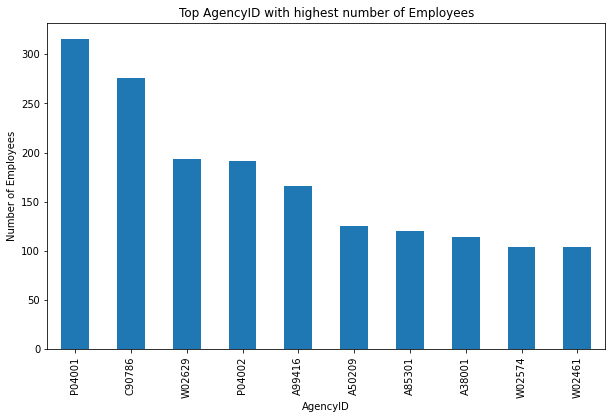

In [45]:
plt.figure(figsize=(10,6))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Employees')
plt.title('Top AgencyID with highest number of Employees')
plt.show()

Let us check people hired in which year have lowest salaries. This is to check if year of hiring has any impact on salary. Because People with more experience will have higher salary.

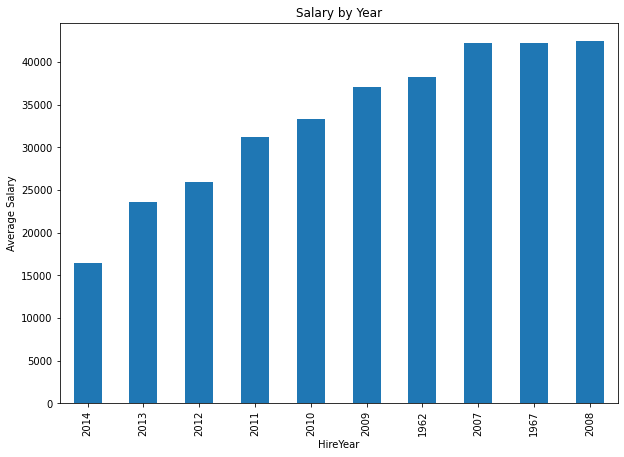

In [46]:
plt.figure(figsize=(10,7))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('Average Salary')
plt.title('Salary by Year')
plt.show()

The trend above suggests that salary of employees increase with experience in company. So now lets calculate experience in days with Agency.

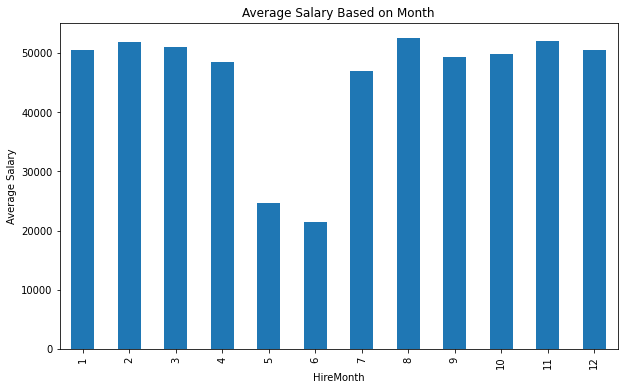

In [47]:
plt.figure(figsize=(10,6))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average Salary')
plt.title("Average Salary Based on Month")
plt.show()

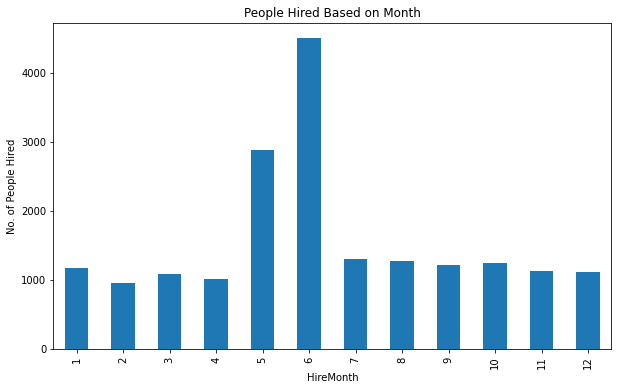

In [48]:
plt.figure(figsize=(10,6))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('No. of People Hired')
plt.title("People Hired Based on Month")
plt.show()

We Can Conclude that more people are hired in the month of May and June but their average salary is relatively less.

<Figure size 1080x1512 with 0 Axes>

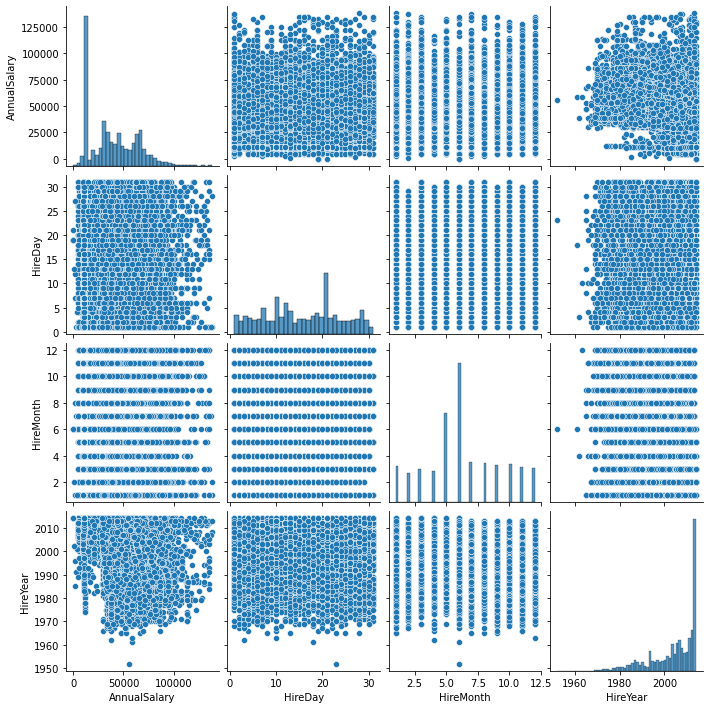

In [49]:
plt.figure(figsize=(15,21))
sns.pairplot(salary_cpy)
plt.show()

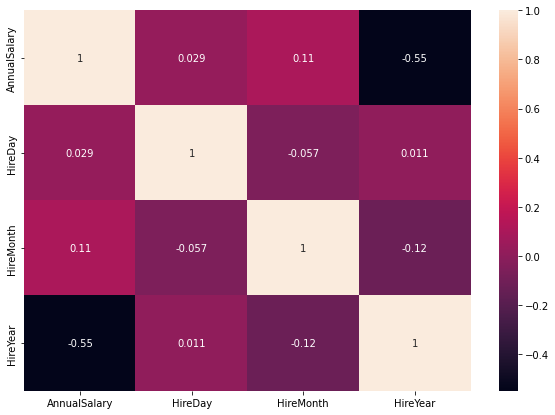

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(salary_cpy.corr(),annot=True)
plt.show()

## Feature Engineering 

Creating a Copy of DataFrame

In [51]:
salary_master=salary_cpy.copy()

We are using mean encoding here as the number of labels of catogorical variables are very high and if we use any other method then that will create unnecessary variables or labelling might not be appropriate. 

Apply mean encoding for Job Title 

In [52]:
mean_job=salary_master.groupby(['JobTitle'])['AnnualSalary'].mean()
salary_master['JobTitle']=salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle']

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18885, dtype: float64

In [53]:
#Apply mean encoding for Agency
mean_agency=salary_master.groupby(['Agency'])['AnnualSalary'].mean()
salary_master['Agency']=salary_master['Agency'].map(mean_agency)
salary_master['Agency']

0        11310.270645
1        51495.424242
2        64874.560224
3        39980.900360
4        61481.005417
             ...     
18976    11310.270645
18977    11346.315789
18978    61481.005417
18979    61481.005417
18980    42565.513078
Name: Agency, Length: 18885, dtype: float64

In [54]:
#Apply mean encoding for AgencyID
mean_agencyID=salary_master.groupby(['AgencyID'])['AnnualSalary'].mean()
salary_master['AgencyID']=salary_master['AgencyID'].map(mean_agencyID)
salary_master['AgencyID']

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18885, dtype: float64

In [55]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18885 non-null  object 
 1   JobTitle      18885 non-null  float64
 2   AgencyID      18885 non-null  float64
 3   Agency        18885 non-null  float64
 4   HireDate      18885 non-null  object 
 5   AnnualSalary  18885 non-null  float64
 6   HireDay       18885 non-null  int64  
 7   HireMonth     18885 non-null  int64  
 8   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [56]:
#We Can drop Name and HireDate columns as they are not much useful for salary prediction

In [57]:
salary_master=salary_master.drop(['HireDate','Name'],axis=1)


In [58]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18885 non-null  float64
 1   AgencyID      18885 non-null  float64
 2   Agency        18885 non-null  float64
 3   AnnualSalary  18885 non-null  float64
 4   HireDay       18885 non-null  int64  
 5   HireMonth     18885 non-null  int64  
 6   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


#Train-Test-Split

In [59]:
#split data into train and test using train-test-split

salary_train,salary_test=train_test_split(salary_master,train_size=0.7,random_state=10)

In [60]:
print(salary_train.shape)
print(salary_test.shape)

(13219, 7)
(5666, 7)


In [61]:
# Divide train set into dependent and independent variables

y_train=salary_train.pop('AnnualSalary')
x_train=salary_train

In [62]:
# Divide test set into dependent and independent variables

y_test=salary_test.pop('AnnualSalary')
x_test=salary_test

In [63]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,21570.423841,21474.446429,31494.602740,26,3,2007
7529,11313.967200,11310.000000,11310.270645,16,6,2014
15366,11313.967200,11310.000000,11310.270645,10,6,2013
3237,11313.967200,11310.000000,11310.270645,11,6,2009
16659,11313.967200,11310.000000,11310.270645,19,6,2014
...,...,...,...,...,...,...
9453,11313.967200,11310.000000,11310.270645,21,5,2014
7371,29925.666667,33754.400000,31594.490526,4,3,2002
17822,34098.128205,38263.434783,31494.602740,27,5,1999
7373,42275.081081,62661.900000,62661.900000,6,10,1969


#Feature Scaling 

Standardization

In [64]:
scaler=StandardScaler()

In [65]:
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

In [66]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,-0.739384,-0.813601,-0.382483,1.220063,-1.143251,0.282241
7529,-1.162446,-1.272054,-1.345994,0.026686,-0.124696,0.955021
15366,-1.162446,-1.272054,-1.345994,-0.689340,-0.124696,0.858910
3237,-1.162446,-1.272054,-1.345994,-0.570003,-0.124696,0.474464
16659,-1.162446,-1.272054,-1.345994,0.384699,-0.124696,0.955021
...,...,...,...,...,...,...
9453,-1.162446,-1.272054,-1.345994,0.623375,-0.464215,0.955021
7371,-0.394744,-0.259730,-0.377714,-1.405367,-1.143251,-0.198316
17822,-0.222637,-0.056356,-0.382483,1.339401,-0.464215,-0.486650
7373,0.114649,1.044104,1.105307,-1.166691,1.233377,-3.369991


In [67]:
x_test[x_test.columns]=scaler.fit_transform(x_test[x_test.columns])

In [68]:
x_test

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
9797,0.871212,0.960094,1.051861,1.340110,0.549432,0.374341
4541,-1.163184,-1.267142,-1.344612,0.625637,-0.465372,0.953483
2860,-1.163184,-1.267142,-1.342890,1.459188,-0.127104,0.856960
8139,1.335218,1.374789,1.500810,0.268400,0.549432,0.374341
2876,0.033694,0.192605,0.024879,0.387479,0.211164,0.760436
...,...,...,...,...,...,...
11213,0.335475,0.495910,0.403835,0.506558,-0.127104,0.856960
3366,1.288703,1.583918,1.172629,1.697346,0.887700,0.856960
11606,0.485825,1.057566,0.606458,-1.279624,0.211164,-2.521373
14382,1.132004,1.285470,1.500810,0.506558,-1.141908,0.181293


#Model Building 

We are buiding linear regression model.

In [69]:
lr= LinearRegression()

In [70]:
salary_reg = lr.fit(x_train,y_train)

In [71]:
salary_reg.score(x_train,y_train)

0.9652498005354452

In [72]:
salary_reg.score(x_test,y_test)

0.964718100171567

Even though our model performs well on train data, that doesn't mean model is good.

The Model should equally perform well on test Data i.e. the Data that model has not encountered yet. Only then a model is  considered  a good model.

If Model is Performing good on training data and not on test data then we can overfitting is there. And When model doesn't perform well on either train or test data then underfitting is there.
Overfitting and Underfitting can be treated by regularization.



In [73]:
print(salary_reg.coef_)
print(salary_reg.intercept_)

[22107.57282687  2772.00640937 -1638.4865014    -78.8780093
  -103.80619218 -2104.19178488]
39505.7653990468


In [74]:
y_pred=salary_reg.predict(x_test)

In [75]:
y_pred

array([58753.6548647 , 10473.83435188, 10573.25464604, ...,
       57568.54147237, 65333.01152927, 11179.53152683])

In [76]:
y_test

9797     59409.0
4541     11310.0
2860     11310.0
8139     66231.0
2876     40303.0
          ...   
11213    40954.0
3366     69900.0
11606    57900.0
14382    65480.0
394      11310.0
Name: AnnualSalary, Length: 5666, dtype: float64

Out of all features JobTitle, AgencyId and HireDay are major drivers for explaining variance in annual salary as their coefficient value is higher than other features.

JobTitle and AgencyId will have Positive impact on Target as their coefficient value is Positive.

In [77]:
## out  of all features agencyid, job title and hireyear are the major driver for explaining variance in annual salary
#because yhey have higher coeficient value.
## other than first two features all features are negatively correlated with annual salary.